<a href="https://colab.research.google.com/github/reallylongaddress/abnb_preprocessor/blob/master/Notebooks/DataPreprocessingAndMerging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import os
import numpy as np
import pandas as pd
from google.colab import drive
# from datetime import date
# import matplotlib.pyplot as plt

import datetime
from datetime import date
from dateutil.relativedelta import relativedelta


In [64]:
drive = drive.mount('/content/drive/')
data_path = '/content/drive/My Drive/Colab_Data/AirBnb/Italy/Sicily/'


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [71]:
#listing_detail_df = ld_df
ld_file_path = data_path + 'detailed_listings.csv'
ld_df_clean = pd.read_csv(ld_file_path, nrows=10000)

ld_df = ld_df_clean.copy()
ld_df.head()


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,207654,https://www.airbnb.com/rooms/207654,20220625122941,2022-06-25,"Etna Holiday Home,Studio Melograno",It is a studio apartment with bathroom and kit...,"The house is very close to the ""Monti Rossi"", ...",https://a0.muscache.com/pictures/111476311/ba7...,848707,https://www.airbnb.com/users/show/848707,...,4.71,4.67,4.76,NaN,t,4,4,0,0,0.60
1,125569,https://www.airbnb.com/rooms/125569,20220625122941,2022-06-25,etna appartamento in villa Nicolosi,<b>The space</b><br />Nuovissimo appartamento ...,NaN,https://a0.muscache.com/pictures/1244569/27dbe...,623847,https://www.airbnb.com/users/show/623847,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
2,702537,https://www.airbnb.com/rooms/702537,20220625122941,2022-06-25,LA VILLETTA SULLA SPIAGGIA,<b>The space</b><br />3384998890 La villetta s...,NaN,https://a0.muscache.com/pictures/9428704/58e0f...,13805839,https://www.airbnb.com/users/show/13805839,...,4.50,4.50,4.50,NaN,f,3,3,0,0,0.03
3,230912,https://www.airbnb.com/rooms/230912,20220625122941,2022-06-26,Affitto Villa San Vito Lo Capo,Villa per totale relax<br /><br /><b>The space...,NaN,https://a0.muscache.com/pictures/45340906/12c4...,1002197,https://www.airbnb.com/users/show/1002197,...,4.43,3.43,3.71,NaN,f,2,2,0,0,0.07
4,137342,https://www.airbnb.com/rooms/137342,20220625122941,2022-06-25,Villa with pool 4 Pax in Ragusa - Sicily,The house is a typical ancient holiday house r...,NaN,https://a0.muscache.com/pictures/869353/b96f65...,671577,https://www.airbnb.com/users/show/671577,...,5.00,4.60,5.00,NaN,f,2,2,0,0,0.08


In [77]:
pd.DataFrame(data=ld_df.isna().sum(), columns=['sum']).sort_values(by='sum', ascending=False).head(30)


,sum
neighbourhood_group_cleansed,10000
bathrooms,10000
calendar_updated,10000
license,9703
host_neighbourhood,9694
host_about,5821
neighborhood_overview,4779
neighbourhood,4779
review_scores_value,3474
review_scores_location,3474


In [95]:
def clean_listing_details(df):
  df_clean = df.copy()
  # print(f'a df_clean.shape: {df_clean.shape}')

  # print(f'only_active_listings a: {df_clean.shape}')
  #filter those with no reviews in 130 days
  df_clean = df_clean[df_clean['number_of_reviews_l30d']>0]
  # print(f'only_active_listings b: {df_clean.shape}')

  # #drop any column where > 50% null
  # thresh = len(df) * .15
  # df_clean.dropna(thresh = thresh, axis = 1, inplace = True)
  # print(f'b df_clean.shape: {df_clean.shape}')

  df_clean['price_float'] = [float((price[1:]).replace(',', '')) for price in df_clean['price']]
  # display(df_clean.columns)|

  #useless columns
  drop_columns = ['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license', 'host_neighbourhood',
                  'scrape_id', 'name', 'description', 
                  'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 
                  'neighbourhood', 'host_name', 'host_location', 'host_thumbnail_url', 
                  'host_about', 'host_picture_url', 
                  'neighbourhood_cleansed', 'host_has_profile_pic', 'calendar_last_scraped',
                  'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
                  'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                  'host_listings_count', 'host_verifications', 'host_identity_verified', 'price']#, '', '', '', '', '']
                  
  print(f'a df_clean.shape: {df_clean.shape}')
  df_clean = df_clean.drop(columns=drop_columns)
  print(f'b df_clean.shape: {df_clean.shape}')

  #uselesss rows
  na_cols = ['review_scores_cleanliness', 'review_scores_value', 'review_scores_accuracy', 
            'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
            'first_review', 'last_review', 'review_scores_rating', 'reviews_per_month', 
            'host_response_rate', 'host_response_time']
  df_clean = df_clean.dropna(subset=na_cols)  

  return df_clean

'''
Remove listings with no review in 6 months?
show only entire homes (no private/shared rooms)
''';


In [96]:
df = clean_listing_details(ld_df)
df.head()

a df_clean.shape: (1989, 75)
b df_clean.shape: (1989, 46)


,id,listing_url,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,latitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price_float
4,137342,https://www.airbnb.com/rooms/137342,2022-06-25,2011-06-06,within an hour,100%,100%,f,1.0,36.92940,...,4.80,5.00,4.90,5.00,5.00,4.60,5.00,f,0.08,110.0
9,307482,https://www.airbnb.com/rooms/307482,2022-06-26,2011-09-29,within an hour,100%,65%,t,3.0,38.20894,...,4.83,4.83,4.83,4.88,4.92,4.83,4.71,t,0.22,145.0
13,3765138,https://www.airbnb.com/rooms/3765138,2022-06-25,2012-09-09,within an hour,100%,96%,t,2.0,38.07290,...,4.71,4.71,4.86,4.93,4.86,4.21,4.86,t,0.15,56.0
18,3847293,https://www.airbnb.com/rooms/3847293,2022-06-26,2014-08-11,within a few hours,90%,100%,f,1.0,37.51121,...,4.67,4.79,4.76,4.88,4.78,4.44,4.67,f,0.89,54.0
22,3882447,https://www.airbnb.com/rooms/3882447,2022-06-26,2013-08-22,within an hour,100%,100%,t,1.0,36.83871,...,4.90,4.96,4.98,4.98,4.99,4.53,4.90,f,1.90,51.0


In [99]:
pd.DataFrame(data=df.isna().sum(), columns=['sum']).sort_values(by='sum', ascending=False).head(30)


,sum
bedrooms,43
beds,27
bathrooms_text,3
id,0
maximum_nights_avg_ntm,0
availability_30,0
availability_60,0
availability_90,0
availability_365,0
number_of_reviews,0


In [100]:
# df.head()

In [101]:
# df.isna().sum()

In [102]:
# print(df.shape)
# na_cols = ['review_scores_cleanliness', 'review_scores_value', 'review_scores_accuracy', 
#            'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
#            'first_review', 'last_review', 'review_scores_rating', 'reviews_per_month', 
#            'host_response_rate', 'host_response_time']
# df.dropna(subset=na_cols, inplace=True)
# print(df.shape)

In [103]:
# (df.isnull().sum()).sort_values(ascending=False).head(30)

In [104]:
# df2 = df.copy()

In [105]:
#load the reviews DF
reviews_file_path = data_path + 'summary_reviews.csv'
reviews_df = pd.read_csv(reviews_file_path)

#create a Date Object to compare gainst
reviews_df['DateObject']= pd.to_datetime(reviews_df['date'])

In [106]:
def reviews_last_year(listing_id, last_scraped, num_years=1):

  since_date = np.datetime64(last_scraped - relativedelta(years=num_years))

  reviews = reviews_df[(reviews_df['listing_id'] == listing_id) & (reviews_df['DateObject'] >= since_date)]
  return len(reviews)

In [107]:
def calc_reviews_last_year(df, num_years=1):

  df.columns

  num_reviews_list = []
  # for i in range(len(df)): 
  for ind in df.index:
    listing_id = df['id'][ind]

    #look back from the last scraped date
    last_scraped_date = datetime.datetime.strptime(df['last_scraped'][ind], "%Y-%m-%d")
    
    num_reviews = reviews_last_year(listing_id, last_scraped_date, num_years=1)
    num_reviews_list.append(num_reviews)

  df[f'num_reviews_{num_years}_years'] = num_reviews_list
  return df

In [112]:
df = calc_reviews_last_year(df)
df.head()

,id,listing_url,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,latitude,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price_float,num_reviews_1_years
4,137342,https://www.airbnb.com/rooms/137342,2022-06-25,2011-06-06,within an hour,100%,100%,f,1.0,36.92940,...,5.00,4.90,5.00,5.00,4.60,5.00,f,0.08,110.0,2
9,307482,https://www.airbnb.com/rooms/307482,2022-06-26,2011-09-29,within an hour,100%,65%,t,3.0,38.20894,...,4.83,4.83,4.88,4.92,4.83,4.71,t,0.22,145.0,3
13,3765138,https://www.airbnb.com/rooms/3765138,2022-06-25,2012-09-09,within an hour,100%,96%,t,2.0,38.07290,...,4.71,4.86,4.93,4.86,4.21,4.86,t,0.15,56.0,7
18,3847293,https://www.airbnb.com/rooms/3847293,2022-06-26,2014-08-11,within a few hours,90%,100%,f,1.0,37.51121,...,4.79,4.76,4.88,4.78,4.44,4.67,f,0.89,54.0,15
22,3882447,https://www.airbnb.com/rooms/3882447,2022-06-26,2013-08-22,within an hour,100%,100%,t,1.0,36.83871,...,4.96,4.98,4.98,4.99,4.53,4.90,f,1.90,51.0,10


In [113]:
df.sort_values(by='num_reviews_1_years', ascending=False)

,id,listing_url,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,latitude,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price_float,num_reviews_1_years
992,41860846,https://www.airbnb.com/rooms/41860846,2022-06-26,2011-08-29,within an hour,100%,98%,t,2.0,37.501710,...,4.83,4.94,4.93,4.92,4.96,4.68,t,7.11,44.0,132
3490,10303931,https://www.airbnb.com/rooms/10303931,2022-06-26,2014-11-23,within an hour,100%,99%,t,1.0,38.117930,...,4.96,4.95,4.95,4.99,4.86,4.85,f,6.42,63.0,100
1022,47852196,https://www.airbnb.com/rooms/47852196,2022-06-26,2018-11-12,within an hour,100%,100%,f,2.0,38.118700,...,4.75,4.80,4.80,4.77,4.87,4.73,t,6.80,79.0,80
4078,6670295,https://www.airbnb.com/rooms/6670295,2022-06-26,2014-11-18,within an hour,100%,100%,t,1.0,38.120450,...,4.94,4.82,4.90,4.96,4.97,4.82,t,4.15,85.0,79
6491,18118838,https://www.airbnb.com/rooms/18118838,2022-06-26,2014-08-04,within an hour,100%,98%,t,3.0,37.505160,...,4.89,4.85,4.93,4.93,4.88,4.77,t,4.63,44.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7797,53337735,https://www.airbnb.com/rooms/53337735,2022-06-26,2019-08-17,within an hour,100%,100%,f,0.0,38.121060,...,5.00,5.00,5.00,5.00,5.00,5.00,t,1.00,35.0,1
7772,583961645973792652,https://www.airbnb.com/rooms/583961645973792652,2022-06-26,2021-05-05,within an hour,100%,100%,f,0.0,37.852417,...,5.00,5.00,5.00,5.00,5.00,5.00,t,1.00,76.0,1
704,26466983,https://www.airbnb.com/rooms/26466983,2022-06-25,2018-06-30,within an hour,100%,100%,f,1.0,37.490810,...,4.80,5.00,4.80,5.00,5.00,5.00,t,0.11,25.0,1
9219,604065102509916815,https://www.airbnb.com/rooms/604065102509916815,2022-06-26,2022-04-13,within an hour,100%,100%,f,0.0,38.154390,...,5.00,5.00,5.00,5.00,5.00,5.00,f,1.00,144.0,1


In [114]:
#ASSUMPTIONS
ave_length_of_stay = 5 #average length stay
bookings_per_review = 2 #for every review there were X bookings

In [115]:
#calculate annual revenue, using greater of average stay and minimium stay
def calculate_annual_revenue_1(df, ave_days=5):
  annual_revenue_list = []

  for ind in df.index:  
    num_days = ave_days
    if df['minimum_nights_avg_ntm'][ind] > num_days:
      num_days = df['minimum_nights_avg_ntm'][ind]

    #equation:  (2 * number_reviews) * (greater of average stay and minimium stay) * (daily price)
    annual_revenue = (bookings_per_review * df['num_reviews_1_years'][ind]) * num_days * df['price_float'][ind] 

    annual_revenue_list.append(annual_revenue)

  df['revenue_1'] = annual_revenue_list
  return df

#calculate annual revenue, ave_stay = min_stay
def calculate_annual_revenue_2(df):
  annual_revenue_list = []
  for ind in df.index:  

    #equation:  (2 * number_reviews) * (ave_min_stay) * (daily price)
    annual_revenue = (bookings_per_review * df['num_reviews_1_years'][ind]) * df['minimum_nights_avg_ntm'][ind] * df['price_float'][ind] 

    annual_revenue_list.append(annual_revenue)

  df['revenue_2'] = annual_revenue_list
  return df



In [116]:
df_revenue = df.copy()
df_revenue = calculate_annual_revenue_1(df_revenue)
df_revenue = calculate_annual_revenue_2(df_revenue)
df_revenue.head()

,id,listing_url,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price_float,num_reviews_1_years,revenue_1,revenue_2
4,137342,https://www.airbnb.com/rooms/137342,2022-06-25,2011-06-06,within an hour,100%,100%,f,1.0,36.92940,...,5.00,5.00,4.60,5.00,f,0.08,110.0,2,2640.0,2640.0
9,307482,https://www.airbnb.com/rooms/307482,2022-06-26,2011-09-29,within an hour,100%,65%,t,3.0,38.20894,...,4.88,4.92,4.83,4.71,t,0.22,145.0,3,4350.0,2610.0
13,3765138,https://www.airbnb.com/rooms/3765138,2022-06-25,2012-09-09,within an hour,100%,96%,t,2.0,38.07290,...,4.93,4.86,4.21,4.86,t,0.15,56.0,7,3920.0,784.0
18,3847293,https://www.airbnb.com/rooms/3847293,2022-06-26,2014-08-11,within a few hours,90%,100%,f,1.0,37.51121,...,4.88,4.78,4.44,4.67,f,0.89,54.0,15,8100.0,5184.0
22,3882447,https://www.airbnb.com/rooms/3882447,2022-06-26,2013-08-22,within an hour,100%,100%,t,1.0,36.83871,...,4.98,4.99,4.53,4.90,f,1.90,51.0,10,5100.0,3060.0


In [117]:
df_revenue.sort_values(by='revenue_2', ascending=False).head(40)

,id,listing_url,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price_float,num_reviews_1_years,revenue_1,revenue_2
2856,49360440,https://www.airbnb.com/rooms/49360440,2022-06-26,2020-02-25,within an hour,100%,100%,f,29.0,38.051650,...,5.00,4.90,5.00,4.90,t,0.89,682.0,10,68200.0,57288.0
5309,49313744,https://www.airbnb.com/rooms/49313744,2022-06-26,2021-04-20,within an hour,100%,100%,t,1.0,37.855050,...,5.00,4.95,5.00,4.90,t,3.30,92.0,39,55972.8,55972.8
731,30546339,https://www.airbnb.com/rooms/30546339,2022-06-25,2013-11-23,within an hour,93%,100%,f,33.0,36.806160,...,4.83,4.89,5.00,4.89,t,0.47,452.0,9,54511.2,54511.2
8347,20702449,https://www.airbnb.com/rooms/20702449,2022-06-25,2012-09-16,within a few hours,100%,50%,f,5.0,36.799100,...,4.76,4.85,4.83,4.65,f,0.84,1000.0,8,80000.0,48000.0
5410,51419912,https://www.airbnb.com/rooms/51419912,2022-06-26,2014-11-09,within an hour,99%,100%,f,288.0,38.115830,...,4.89,4.89,4.89,4.83,t,2.14,462.0,18,83160.0,46569.6
7263,33226578,https://www.airbnb.com/rooms/33226578,2022-06-26,2016-01-29,within an hour,100%,86%,t,5.0,38.196570,...,4.95,5.00,4.81,4.76,t,0.61,279.0,11,44807.4,44807.4
3996,37487942,https://www.airbnb.com/rooms/37487942,2022-06-26,2018-04-25,within a few hours,100%,86%,t,1.0,37.832157,...,4.89,4.94,4.94,4.83,f,0.53,265.0,12,44520.0,44520.0
8936,42875623,https://www.airbnb.com/rooms/42875623,2022-06-26,2016-05-10,within an hour,100%,100%,t,0.0,37.852160,...,4.97,5.00,5.00,4.92,t,1.73,177.0,31,54870.0,43896.0
6802,16170090,https://www.airbnb.com/rooms/16170090,2022-06-26,2015-09-29,within an hour,100%,100%,f,39.0,37.649490,...,5.00,4.87,4.74,4.74,t,0.37,536.0,7,43523.2,43523.2
8468,19496282,https://www.airbnb.com/rooms/19496282,2022-06-25,2017-06-25,within an hour,100%,100%,t,1.0,37.019540,...,5.00,5.00,4.96,4.93,t,0.53,329.0,17,55930.0,42506.8


In [118]:
df_revenue.sort_values(by='revenue_2', ascending=True).head(40)

,id,listing_url,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price_float,num_reviews_1_years,revenue_1,revenue_2
3044,600792051105747810,https://www.airbnb.com/rooms/600792051105747810,2022-06-25,2015-03-26,within an hour,100%,100%,f,5.0,37.580578,...,5.00,5.00,5.00,5.00,t,1.00,15.0,1,150.0,30.0
8053,628071601640159791,https://www.airbnb.com/rooms/628071601640159791,2022-06-26,2019-11-29,within an hour,100%,100%,f,0.0,38.107120,...,5.00,5.00,5.00,5.00,t,1.00,16.0,1,160.0,32.0
5404,51382065,https://www.airbnb.com/rooms/51382065,2022-06-26,2017-12-24,within an hour,97%,100%,f,6.0,37.508420,...,5.00,5.00,5.00,5.00,t,1.00,23.0,1,230.0,46.0
1219,49067020,https://www.airbnb.com/rooms/49067020,2022-06-25,2021-04-06,within an hour,100%,100%,f,0.0,37.648690,...,4.50,5.00,3.50,4.50,f,0.14,32.0,1,320.0,64.0
6035,647732032869337175,https://www.airbnb.com/rooms/647732032869337175,2022-06-25,2022-06-12,within an hour,100%,100%,f,0.0,36.944760,...,5.00,5.00,5.00,5.00,t,1.00,32.0,1,320.0,64.0
4565,644608068027032559,https://www.airbnb.com/rooms/644608068027032559,2022-06-25,2020-02-10,within a few hours,96%,98%,f,0.0,37.477970,...,5.00,4.00,2.00,1.00,f,1.00,33.0,1,330.0,66.0
7860,610544677428019867,https://www.airbnb.com/rooms/610544677428019867,2022-06-25,2012-08-27,within a few hours,100%,100%,f,1.0,36.838436,...,5.00,5.00,4.00,5.00,t,1.00,35.0,1,350.0,70.0
7797,53337735,https://www.airbnb.com/rooms/53337735,2022-06-26,2019-08-17,within an hour,100%,100%,f,0.0,38.121060,...,5.00,5.00,5.00,5.00,t,1.00,35.0,1,350.0,70.0
9342,627002947764542177,https://www.airbnb.com/rooms/627002947764542177,2022-06-26,2022-05-14,within an hour,100%,100%,f,0.0,37.314350,...,5.00,5.00,5.00,5.00,t,1.00,35.0,1,350.0,70.0
482,24565567,https://www.airbnb.com/rooms/24565567,2022-06-25,2018-04-11,within a few hours,80%,60%,f,1.0,37.518680,...,4.00,3.00,3.00,3.00,f,1.00,37.0,1,370.0,74.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d80104490>,
      dtype=object)

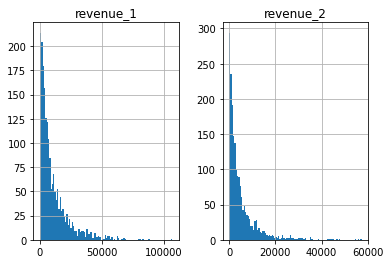

In [119]:
df_revenue[['revenue_1', 'revenue_2']].hist(bins=100)